In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the lat and long to a list 
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a7668ab595e10e77853ebca2593291c9


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bay roberts
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | abha
Processing Record 8 of Set 1 | nyagan
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | faya
Processing Record 13 of Set 1 | outjo
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | stephenville
Processing Record 16 of Set 1 | camacha
Processing Record 17 of Set 1 | semey
Processing Record 18 of Set 1 | half moon bay
Processing Record 19 of Set 1 | cervantes
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | lumphat
Processing Record 23 of Set 1 | mar del plata
P

Processing Record 40 of Set 4 | torbay
Processing Record 41 of Set 4 | sola
Processing Record 42 of Set 4 | hervey bay
Processing Record 43 of Set 4 | cabo san lucas
Processing Record 44 of Set 4 | gornoye loo
Processing Record 45 of Set 4 | byron bay
Processing Record 46 of Set 4 | odda
Processing Record 47 of Set 4 | prince george
Processing Record 48 of Set 4 | rybnaya sloboda
Processing Record 49 of Set 4 | kieta
Processing Record 50 of Set 4 | chagda
City not found. Skipping...
Processing Record 1 of Set 5 | balykshi
Processing Record 2 of Set 5 | severo-kurilsk
Processing Record 3 of Set 5 | saurimo
Processing Record 4 of Set 5 | golden
Processing Record 5 of Set 5 | payo
Processing Record 6 of Set 5 | jieshi
Processing Record 7 of Set 5 | touho
Processing Record 8 of Set 5 | goderich
Processing Record 9 of Set 5 | fare
Processing Record 10 of Set 5 | ilulissat
Processing Record 11 of Set 5 | talakan
Processing Record 12 of Set 5 | nanortalik
Processing Record 13 of Set 5 | xinxi

Processing Record 29 of Set 8 | tarko-sale
Processing Record 30 of Set 8 | tierralta
Processing Record 31 of Set 8 | wamba
Processing Record 32 of Set 8 | kimbe
Processing Record 33 of Set 8 | opole
Processing Record 34 of Set 8 | nsanje
Processing Record 35 of Set 8 | santa clara
Processing Record 36 of Set 8 | nouadhibou
Processing Record 37 of Set 8 | general roca
Processing Record 38 of Set 8 | barra do bugres
Processing Record 39 of Set 8 | novikovo
Processing Record 40 of Set 8 | goure
Processing Record 41 of Set 8 | paradwip
City not found. Skipping...
Processing Record 42 of Set 8 | rolim de moura
City not found. Skipping...
Processing Record 43 of Set 8 | panama city
Processing Record 44 of Set 8 | athabasca
Processing Record 45 of Set 8 | provideniya
Processing Record 46 of Set 8 | camotan
Processing Record 47 of Set 8 | uzhur
Processing Record 48 of Set 8 | puerto escondido
Processing Record 49 of Set 8 | aksarka
Processing Record 50 of Set 8 | axim
Processing Record 1 of Se

Processing Record 15 of Set 12 | tacoronte
Processing Record 16 of Set 12 | salalah
Processing Record 17 of Set 12 | sindor
Processing Record 18 of Set 12 | wanderlandia
City not found. Skipping...
Processing Record 19 of Set 12 | dubbo
Processing Record 20 of Set 12 | tucurui
Processing Record 21 of Set 12 | hamilton
Processing Record 22 of Set 12 | kadaya
Processing Record 23 of Set 12 | houlton
Processing Record 24 of Set 12 | myitkyina
Processing Record 25 of Set 12 | barbar
City not found. Skipping...
Processing Record 26 of Set 12 | sao felix do xingu
Processing Record 27 of Set 12 | lopatino
Processing Record 28 of Set 12 | dingle
Processing Record 29 of Set 12 | shache
Processing Record 30 of Set 12 | sambava
Processing Record 31 of Set 12 | muroto
Processing Record 32 of Set 12 | calvia
Processing Record 33 of Set 12 | bahile
Processing Record 34 of Set 12 | zheleznodorozhnyy
Processing Record 35 of Set 12 | sawtell
Processing Record 36 of Set 12 | cortez
Processing Record 37 

In [17]:
len(city_data)

533

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,82.40,78,75,11.50,TO,2021-03-04 04:44:37
1,Kanniyakumari,8.0833,77.5667,82.62,58,0,16.33,IN,2021-03-04 04:44:38
2,Kosh-Agach,50.0000,88.6667,1.51,81,7,1.86,RU,2021-03-04 04:44:38
3,Yumen,40.2833,97.2000,43.75,48,70,9.31,CN,2021-03-04 04:44:38
4,Puerto Ayora,-0.7393,-90.3518,75.99,96,50,2.98,EC,2021-03-04 04:41:09
5,Punta Arenas,-53.1500,-70.9167,50.00,71,40,5.75,CL,2021-03-04 04:44:39
6,Hilo,19.7297,-155.0900,75.20,50,1,6.91,US,2021-03-04 04:43:24
7,Nikolskoye,59.7035,30.7861,27.00,86,0,8.95,RU,2021-03-04 04:44:40
8,Saint George,37.1041,-113.5841,57.00,24,90,12.66,US,2021-03-04 04:41:01
9,Kodiak,57.7900,-152.4072,33.80,60,1,13.80,US,2021-03-04 04:44:40


In [19]:
# Change order of columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [20]:
# Change column order in DataFrame
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-03-04 04:44:37,-21.2000,-175.2000,82.40,78,75,11.50
1,Kanniyakumari,IN,2021-03-04 04:44:38,8.0833,77.5667,82.62,58,0,16.33
2,Kosh-Agach,RU,2021-03-04 04:44:38,50.0000,88.6667,1.51,81,7,1.86
3,Yumen,CN,2021-03-04 04:44:38,40.2833,97.2000,43.75,48,70,9.31
4,Puerto Ayora,EC,2021-03-04 04:41:09,-0.7393,-90.3518,75.99,96,50,2.98
5,Punta Arenas,CL,2021-03-04 04:44:39,-53.1500,-70.9167,50.00,71,40,5.75
6,Hilo,US,2021-03-04 04:43:24,19.7297,-155.0900,75.20,50,1,6.91
7,Nikolskoye,RU,2021-03-04 04:44:40,59.7035,30.7861,27.00,86,0,8.95
8,Saint George,US,2021-03-04 04:41:01,37.1041,-113.5841,57.00,24,90,12.66
9,Kodiak,US,2021-03-04 04:44:40,57.7900,-152.4072,33.80,60,1,13.80


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

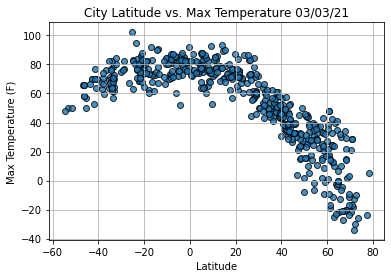

In [23]:
# Import time module
import time

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

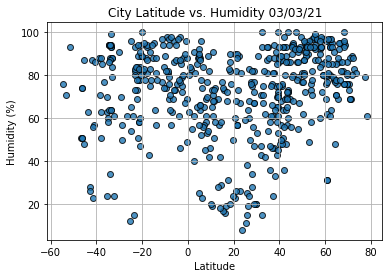

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

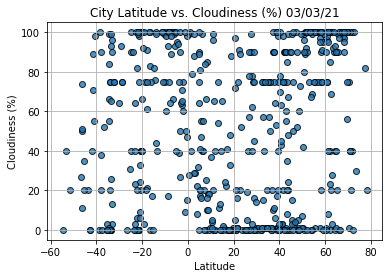

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

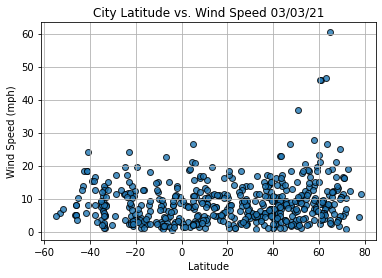

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Country                        ZA
Date          2021-03-04 04:44:42
Lat                      -34.5322
Lng                       20.0403
Max Temp                     66.2
Humidity                       94
Cloudiness                     66
Wind Speed                   6.91
Name: 13, dtype: object

In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

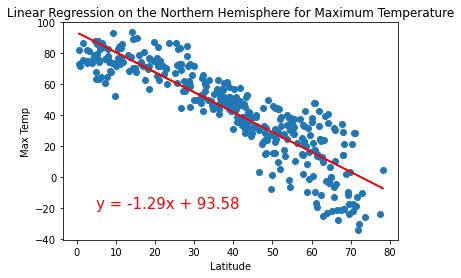

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,-20))

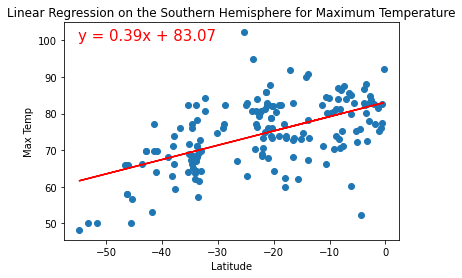

In [48]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-55,100))

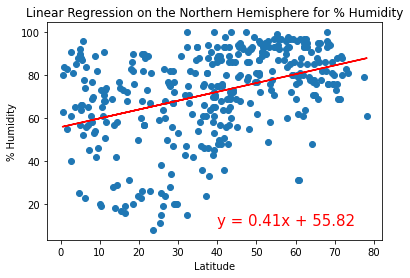

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

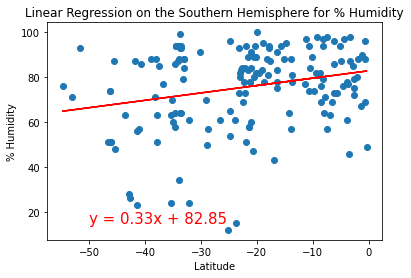

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

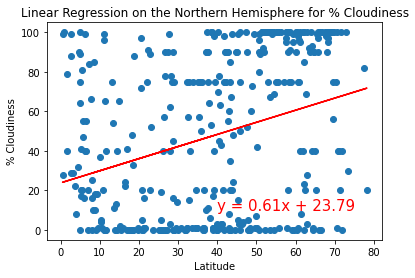

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

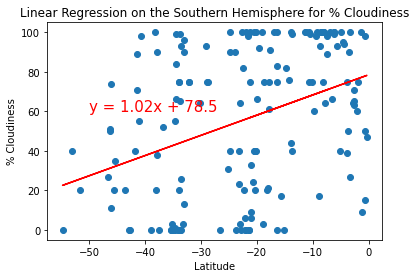

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

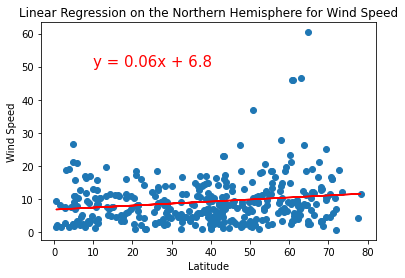

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,50))

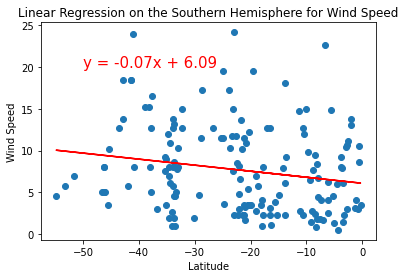

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))
